In [1]:
import pandas as pd

# Графическая 
import seaborn as sns                     # Рисует 
from matplotlib import pyplot as plt      # Подписывает

# Загружаем специальный инструмент для разбивки:  
# from sklearn.model_selection import train_test_split  

# from sklearn.feature_selection import chi2 # хи-квадрат

# # разведывательный анализ данных
# from ydata_profiling import ProfileReport

# import numpy as np

In [2]:
df = pd.read_csv('../data/hotels.csv')
hotels=df.copy()
hotels.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


In [3]:
# Разветка данных
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

Пропуски с столбцах Lat и Lng проверим по адресу

# Удалим дублекаты

In [4]:
# Определим количество дублекатов 
hotels.duplicated ().value_counts()

False    386496
True        307
Name: count, dtype: int64

In [5]:
# удалим дубли
hotels=hotels.drop_duplicates()

# lat & lng

In [6]:
_df=hotels.copy()
_df['lng_Nan']=_df['lng'].isnull()
_df['lat_Nan']=_df['lat'].isnull()
_df['lng&lat_Nan']=_df['lng_Nan']+_df['lat_Nan']
# _df['lng&lat_Nan']=_df[['lng_Nan','lat_Nan']].apply(lambda x: True if x['lng_Nan'] and x['lat_Nan'] else False ,axis=1)
_df_g=_df.groupby('hotel_address')[['lng_Nan','lat_Nan','lng&lat_Nan']].sum()
_df_g[(_df_g['lng_Nan']>0) | (_df_g['lat_Nan']>0)]

,lng_Nan,lat_Nan,lng&lat_Nan
hotel_address,,,
20 Rue De La Ga t 14th arr 75014 Paris France,28,28,28
23 Rue Damr mont 18th arr 75018 Paris France,47,47,47
4 rue de la P pini re 8th arr 75008 Paris France,224,224,224
Bail n 4 6 Eixample 08010 Barcelona Spain,113,113,113
Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria,63,63,63
Hasenauerstra e 12 19 D bling 1190 Vienna Austria,44,44,44
Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria,496,496,496
Josefst dter Stra e 22 08 Josefstadt 1080 Vienna Austria,40,40,40
Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria,182,182,182


Если взять по Городам координаты
'Vienna': [48.2085, 16.373333], 'Paris':  [48.8535, 2.34888], 'Barcelona':  [41.3888, 2.15899]
Но если присмотрется
                                           'Paris':  [48.8535, 2.34888]
     '23 Rue Damr mont 18th arr 75018 Paris France':[48.856663, 2.351556],
 '4 rue de la P pini re 8th arr 75008 Paris France':[44.222128, 8.410980],
                                                     4           6
                                    'Barcelona':  [41.3888, 2.15899]
    'Bail n 4 6 Eixample 08010 Barcelona Spain':[41.396133, 1.655829],
 'Sep lveda 180 Eixample 08011 Barcelona Spain':[41.391510, 2.155331],
                                                  0         1
                                              'Vienna': [48.2085, 16.373333]
 'Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria':[48.222139, 16.357513],
   'Hasenauerstra e 12 19 D bling 1190 Vienna Austria':[48.778035, 15.655650],
                                                         0          1
### Имеются удаленные от центра
1. надо добавить координаты центра
2. из адреса вытащить город 'city' и удалить адрес
3. город закодировать

In [7]:
list_address={'20 Rue De La Ga t 14th arr 75014 Paris France':[48.838331, 2.330948],
 '23 Rue Damr mont 18th arr 75018 Paris France':[48.856663, 2.351556],
 '4 rue de la P pini re 8th arr 75008 Paris France':[44.222128, 8.410980],
 'Bail n 4 6 Eixample 08010 Barcelona Spain':[41.396133, 1.655829],
 'Sep lveda 180 Eixample 08011 Barcelona Spain':[41.391510, 2.155331],
 'Pau Clar s 122 Eixample 08009 Barcelona Spain':[41.504994, 2.245959],
 'Savoyenstra e 2 16 Ottakring 1160 Vienna Austria':[48.209410, 16.323834],
 'Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria':[48.222139, 16.357513],
 'Hasenauerstra e 12 19 D bling 1190 Vienna Austria':[48.778035, 15.655650],
 'Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria':[48.210918, 16.347119],
 'Josefst dter Stra e 22 08 Josefstadt 1080 Vienna Austria':[48.210918, 16.347119],
 'Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria':[48.188405, 16.383052],
 'Paragonstra e 1 11 Simmering 1110 Vienna Austria':[48.176599, 16.413999],
 'Sieveringer Stra e 4 19 D bling 1190 Vienna Austria':[48.245935, 16.341397],
 'Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Austria':[48.218213, 16.394110],
 'W hringer Stra e 12 09 Alsergrund 1090 Vienna Austria':[48.225182, 16.358573],
 'W hringer Stra e 33 35 09 Alsergrund 1090 Vienna Austria':[48.225182, 16.358573]}

for a in list_address:
    hotels.loc[hotels['hotel_address']==a,'lat']=list_address[a][0]
    hotels.loc[hotels['hotel_address']==a,'lng']=list_address[a][1]

<Axes: title={'center': 'Распределение отелей по географическим координатам'}, xlabel='lng', ylabel='lat'>

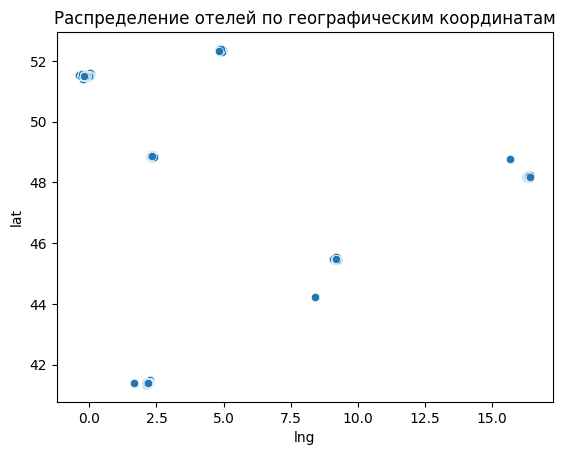

In [8]:
# посмотрим разброс в географических координатах
plt.title('Распределение отелей по географическим координатам')
sns.scatterplot(data = hotels, x = 'lng', y = 'lat' )

In [9]:
# # Округлим координаты до челых значений
# hotels['lat'] = hotels.lat.round()  # округляю
# hotels['lng'] = hotels.lng.round()

In [10]:
# Процедура получает названия городов из признака hotel_address
def get_city(x):
    a=x.split(' ')
    if a[-2]=='United':
        return a[-5]
    else:
        return a[-2] 

# Создаем признак c названием города
hotels['city']=hotels['hotel_address'].apply(get_city)
print('Количество городов =', hotels['city'].nunique())
display(hotels['city'].value_counts())

# удаляем адрес
hotels.drop('hotel_address', axis = 1, inplace=True)

Количество городов = 6


city
London       196773
Barcelona     45132
Paris         44528
Amsterdam     43004
Vienna        29177
Milan         27882
Name: count, dtype: int64

In [11]:
list_city={'London':[51.507351,-0.127696],'Barcelona':[41.386378, 2.186760],'Paris':[48.856663, 2.351556],'Amsterdam':[52.373057, 4.892557],'Vienna':[48.206487, 16.363460],'Milan':[45.464183, 9.189595]}
# list_citi={'London':[51,0],'Barcelona':[41, 2],'Paris':[48, 2],'Amsterdam':[52, 4],'Vienna':[48, 16],'Milan':[45, 9]}
# Функция высчитаем расстояние до центра
def Distance(data):
    x_1=data['lat']
    x_2=list_city[data['city']][0]
    y_1=data['lng']
    y_2=list_city[data['city']][1]
    
    return round(((x_1-x_2)**2+(y_1-y_2)**2)**0.5*69)#69500

# Новый признак растояние до центра в км
hotels['Distance']=hotels[['city','lat','lng']].apply(Distance ,axis=1)

hotels['lat']=hotels['lat'].round
hotels['lng']=hotels['lng'].round

In [12]:
# применим к городам on-hot кодирование
temp = list(hotels['city'].value_counts().index)

for index in temp:
    hotels[index]=hotels['city'].apply(lambda x: 1 if x==index else 0 )
    
# Кодируем города в числовые признаки по количеству убывания отелей
hotels['city']=hotels['city'].apply(lambda x:temp.index(x)+1)  
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386496 entries, 0 to 386802
Data columns (total 24 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386496 non-null  int64  
 1   review_date                                 386496 non-null  object 
 2   average_score                               386496 non-null  float64
 3   hotel_name                                  386496 non-null  object 
 4   reviewer_nationality                        386496 non-null  object 
 5   negative_review                             386496 non-null  object 
 6   review_total_negative_word_counts           386496 non-null  int64  
 7   total_number_of_reviews                     386496 non-null  int64  
 8   positive_review                             386496 non-null  object 
 9   review_total_positive_word_counts           386496 non-null  int64  
 10  t

# Дата

In [13]:
# hotels['review_date']=df['review_date'].copy()
# Преобразуем дату из строкового типа в дату
hotels['review_date']=pd.to_datetime(hotels['review_date'])
print('Cамый свежий отзыв',hotels['review_date'].max())
print('Cамый первый отзыв',hotels['review_date'].min())
print('Разное количество дат',hotels['review_date'].nunique())

Cамый свежий отзыв 2017-08-03 00:00:00
Cамый первый отзыв 2015-08-04 00:00:00
Разное количество дат 731


In [14]:
# создадим список из признаков ['year','quarter','month','weekday','Weekend','season']
#                               год,    квартал,  месяц,день-недели,выходной,  сезон
hotels['year']=hotels['review_date'].dt.year-2000
# print(hotels['year'].value_counts())
hotels['quarter']=hotels['review_date'].dt.quarter
# print(hotels['quarter'].value_counts())
hotels['month']=hotels['review_date'].dt.month
# print(hotels['month'].value_counts())
hotels['weekday']=hotels['review_date'].dt.weekday+1
# print(hotels['weekday'].value_counts())
hotels['Weekend']=hotels['weekday'].apply(lambda x: 1 if x==6 or x==7 else 0)
# print(hotels['Weekend'].value_counts())
hotels['season']=hotels['month'].apply(lambda x: x//3+1 if x<12 else 1)
# print(hotels['season'].value_counts())
# plt.title('Распределение по годам')
# sns.kdeplot(hotels['year'])
# sns.kdeplot(hotels['quarter'])
# sns.histplot(hotels['month'], binwidth=0.95)
# sns.kdeplot(hotels['weekday'])
# hotels.drop('review_date', axis = 1, inplace=True)
# print(hotels.shape)
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386496 entries, 0 to 386802
Data columns (total 30 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   additional_number_of_scoring                386496 non-null  int64         
 1   review_date                                 386496 non-null  datetime64[ns]
 2   average_score                               386496 non-null  float64       
 3   hotel_name                                  386496 non-null  object        
 4   reviewer_nationality                        386496 non-null  object        
 5   negative_review                             386496 non-null  object        
 6   review_total_negative_word_counts           386496 non-null  int64         
 7   total_number_of_reviews                     386496 non-null  int64         
 8   positive_review                             386496 non-null  object        
 9 

# Название отеля
hotel_name

In [28]:
top_temp = hotels['hotel_name'].value_counts(normalize=True) 
temp_rate = {}
i=0
for h in top_temp:
  temp_rate.update({top_temp.index[i]: h})
  i +=1
# вводим новый признак - популярность отеля, который в отзыве
hotels['hot_pop'] = hotels['hotel_name'].apply(lambda x: temp_rate[x])


0         0.001524
1         0.002235
2         0.000947
3         0.000621
4         0.003268
            ...   
386798    0.001154
386799    0.004937
386800    0.002466
386801    0.004160
386802    0.003705
Name: hot_pop, Length: 386496, dtype: float64

In [29]:
top_temp = hotels['hotel_name'].value_counts() 
temp_rate = {}
i=0
for h in top_temp:
  temp_rate.update({top_temp.index[i]: h})
  i +=1
# вводим новый признак - популярность отеля, который в отзыве
hotels['hotel_name'] = hotels['hotel_name'].apply(lambda x: temp_rate[x])

# медленный код
# hotels['hot_pop'] = hotels['hotel_name'].apply(lambda x: temp_rate[x])
# name_list=list(hotels['hotel_name'].value_counts().index)
# cout_list=list(hotels['hotel_name'].value_counts().values)
# hotels['hotel_name']=hotels['hotel_name'].apply(lambda x: cout_list[name_list.index(x)])
hotels.info()


<class 'pandas.core.frame.DataFrame'>
Index: 386496 entries, 0 to 386802
Data columns (total 34 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   additional_number_of_scoring                386496 non-null  int64         
 1   review_date                                 386496 non-null  datetime64[ns]
 2   average_score                               386496 non-null  float64       
 3   hotel_name                                  386496 non-null  int64         
 4   review_total_negative_word_counts           386496 non-null  int64         
 5   total_number_of_reviews                     386496 non-null  int64         
 6   review_total_positive_word_counts           386496 non-null  int64         
 7   total_number_of_reviews_reviewer_has_given  386496 non-null  int64         
 8   reviewer_score                              386496 non-null  float64       
 9 

# рецензент_национальность
reviewer_nationality

In [31]:
# print(df.reviewer_nationality.value_counts())
top_temp = hotels['reviewer_nationality'].value_counts(normalize=True) 
temp_rate = {}
i=0
for h in top_temp:
  temp_rate.update({top_temp.index[i]: h})
  i +=1
# вводим новый признак - популярность отеля, который в отзыве
hotels['national_pop'] = hotels['reviewer_nationality'].apply(lambda x: temp_rate[x])

In [18]:
# создали список стран из самых популярных рецензентов в числовом и вулевом
temp=list(hotels['reviewer_nationality'].value_counts().head(11).index)
hotels['reviewer_nationality_num']=hotels['reviewer_nationality'].apply(lambda x: temp.index(x)+1 if x in temp else 12)
hotels['reviewer_nationality_bool']=hotels['reviewer_nationality'].apply(lambda x: 1 if x in temp else 0)
hotels.drop('reviewer_nationality', axis = 1, inplace=True)
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386496 entries, 0 to 386802
Data columns (total 33 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   additional_number_of_scoring                386496 non-null  int64         
 1   review_date                                 386496 non-null  datetime64[ns]
 2   average_score                               386496 non-null  float64       
 3   hotel_name                                  386496 non-null  int64         
 4   negative_review                             386496 non-null  object        
 5   review_total_negative_word_counts           386496 non-null  int64         
 6   total_number_of_reviews                     386496 non-null  int64         
 7   positive_review                             386496 non-null  object        
 8   review_total_positive_word_counts           386496 non-null  int64         
 9 

# отрицательный отзыв
negative_review 

In [19]:
# Если не т неготивного отзава +1 бал
hotels['No Negative']=hotels['negative_review'].apply(lambda x: 1 if x=='No Negative' else 0)
hotels.drop('negative_review', axis = 1, inplace=True)
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386496 entries, 0 to 386802
Data columns (total 33 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   additional_number_of_scoring                386496 non-null  int64         
 1   review_date                                 386496 non-null  datetime64[ns]
 2   average_score                               386496 non-null  float64       
 3   hotel_name                                  386496 non-null  int64         
 4   review_total_negative_word_counts           386496 non-null  int64         
 5   total_number_of_reviews                     386496 non-null  int64         
 6   positive_review                             386496 non-null  object        
 7   review_total_positive_word_counts           386496 non-null  int64         
 8   total_number_of_reviews_reviewer_has_given  386496 non-null  int64         
 9 

# позитивный отзыв
positive_review

In [20]:
# Если нет положительного отзыва то 0 бал
hotels['No Positive']=hotels['positive_review'].apply(lambda x: 0 if x=='No Positive' else 1)
hotels.drop('positive_review', axis = 1, inplace=True)
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386496 entries, 0 to 386802
Data columns (total 33 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   additional_number_of_scoring                386496 non-null  int64         
 1   review_date                                 386496 non-null  datetime64[ns]
 2   average_score                               386496 non-null  float64       
 3   hotel_name                                  386496 non-null  int64         
 4   review_total_negative_word_counts           386496 non-null  int64         
 5   total_number_of_reviews                     386496 non-null  int64         
 6   review_total_positive_word_counts           386496 non-null  int64         
 7   total_number_of_reviews_reviewer_has_given  386496 non-null  int64         
 8   reviewer_score                              386496 non-null  float64       
 9 

# Теги
tags

In [81]:
def pr_pas(x,n=10):
  global nx
  if nx<n:
    print(x)
    nx+=1

In [84]:
nx=0   
def tags_str_to_list(ss):
# функция которая будет из всех тегов выделять только количество дней
# если не указано - возвращаем 0
  # ss = ss.replace("'", '') # сначала удаляем апострофы
  s_s = ss[1:-1].split(', ') # потом разбиваем на список с разделителем ','
  for s in s_s:
    s=s[2:-2]
    if s.find('Stayed') != -1:  # в теге со словом Stayed выделяем число
      if len(s.split()) >1: return int(s.split()[1])
  else: return 0

# это я хотел сделать для каждого тега свой столбец'
#    "тип поездки", "тип путешественника", "тип комнаты", "ночи", "устройство", "следующий"
# ind = ['trip_type', 'traveller_type', 'room_type', 'nights', 'device', 'next']

dd = hotels['tags'].unique() # сначала выделил все уникальные записи в столбце с тегами
print('***** ****** УНИКАЛЬНЫХ множеств тэгов ', len(dd))
                         # потом каждое из этих множеств разбил на составные части,
du = set()               # и стал добавлять их в множество
for ss in dd:
  s = ss[1:-1].split(', ')
  for i in s:
    du.add(i[2:-2])
print('Уникальных тэгов всего: ', len(du))
# ответ всё равно неверный, пишет

# из всех тегов выделяем только количество дней, на сколько останавливался рецензент (0 если не указано)
# создаём новый признак days
hotels['days'] = hotels['tags'].apply(tags_str_to_list)
print(hotels['days'].value_counts()[:8])    # для проверки вывел первые 8 значений
# sns.histplot(hotels['days'])
# hotels.info()

***** ****** УНИКАЛЬНЫХ множеств тэгов  47135
Уникальных тэгов всего:  2368
days
1    145373
2    100263
3     72000
4     35748
5     15611
6      7399
7      5549
8      1910
Name: count, dtype: int64


# дневный_последний_отчет
days_since_review

In [22]:
# Делаем столбец days_since_review, цифровым
hotels['days_since_review'] = hotels['days_since_review'].apply(lambda x: int(x.split()[0]))

In [23]:
hotels['days_since_num'] = hotels['days_since_review'].apply(lambda x: 1 if x<250 else 3 if x>500 else 2)
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386496 entries, 0 to 386802
Data columns (total 34 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   additional_number_of_scoring                386496 non-null  int64         
 1   review_date                                 386496 non-null  datetime64[ns]
 2   average_score                               386496 non-null  float64       
 3   hotel_name                                  386496 non-null  int64         
 4   review_total_negative_word_counts           386496 non-null  int64         
 5   total_number_of_reviews                     386496 non-null  int64         
 6   review_total_positive_word_counts           386496 non-null  int64         
 7   total_number_of_reviews_reviewer_has_given  386496 non-null  int64         
 8   reviewer_score                              386496 non-null  float64       
 9 